The task :
You receive 4 items recommended for you when you are in the cart page, 
how would yo`u generate a recommendation engine based on the items that customers have added to the basket? 


In [1]:
# code written by Nasim Khadem 
# https://github.com/nasimkh

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules


# load 
Let's just load the data and have a look 

In [3]:

df_orginal= pd.read_csv('/Users/nasim/Documents/on case /on_recommendation.csv')

In [4]:
df_orginal.head()

,Web Orders Transaction Number,Account Account Number,Item Default Item Parent Group,Item Item Group Description,Item Item Fabric Description,Item Size,Date Order Date,Web Orders Packed Quantity
0,SO-1905014,464874.0,Shoes,Cloud (Classic),Black,M 7,05.05.18,1
1,SO-1791826,389046.0,Shoes,Cloud (Classic),Black,M 7,03.01.18,0
2,SO-1899817,461621.0,Shoes,Cloud (Classic),Black,M 7,30.04.18,1
3,SO-1798245,328237.0,Shoes,Cloud (Classic),Black,M 7,12.01.18,1
4,SO-1931576,482985.0,Shoes,Cloud (Classic),Storm,M 7,30.05.18,1


In [5]:
df_orginal.tail()

,Web Orders Transaction Number,Account Account Number,Item Default Item Parent Group,Item Item Group Description,Item Item Fabric Description,Item Size,Date Order Date,Web Orders Packed Quantity
229216,SO-2035013,561252.0,Accessories,On Pack Single,Shadow,One size,15.08.18,1
229217,SO-2159294,204890.0,Accessories,On Pack Single,Shadow,One size,16.11.18,1
229218,SO-2172327,664181.0,Accessories,On Pack Single,Shadow,One size,24.11.18,1
229219,SO-2116474,71860.0,Accessories,On Pack Single,Shadow,One size,15.10.18,1
229220,SO-2163694,657186.0,Accessories,On Pack Single,Shadow,One size,19.11.18,1


## rename columns
The column names are very long and not really clean , will rename them for faster coding.

In [6]:
df=df_orginal.rename(columns={"Web Orders Transaction Number": "tid", "Account Account Number": "aid" ,
                   'Item Default Item Parent Group' : 'parent_group' ,
                  'Item Item Group Description' : 'group_desc', 'Item Item Fabric Description' : 'fabric_desc',
                  'Item Size': 'size', 'Date Order Date': 'order_date' , 'Web Orders Packed Quantity' : 'quantity'})

## quick summary 
Looking at the data types and quick summary of the dataset. 

In [7]:
df.describe()

,aid,quantity
count,229103.000000,229221.000000
mean,585437.227985,0.989011
std,223311.660883,0.265167
min,1165.000000,-1.000000
25%,426498.500000,1.000000
50%,602290.000000,1.000000
75%,755092.000000,1.000000
max,968582.000000,12.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229221 entries, 0 to 229220
Data columns (total 8 columns):
tid             229221 non-null object
aid             229103 non-null float64
parent_group    229221 non-null object
group_desc      229221 non-null object
fabric_desc     229221 non-null object
size            229221 non-null object
order_date      229221 non-null object
quantity        229221 non-null int64
dtypes: float64(1), int64(1), object(6)
memory usage: 14.0+ MB


## cleaning 
There are only two numerical value. However the account id is also not really numeric. 

1. The date column should be turned to date since it is an obj. ( i don't use date right now ) 


In [9]:
df.groupby('tid').count()['aid'].describe()

count    180126.000000
mean          1.271904
std           0.766987
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          54.000000
Name: aid, dtype: float64

## Grouping 
I have grouped by the transaction number to see how many items are bought at a given time.
The max is 54 item at one go.Let's group by account number to see if we have returning customers. 


In [10]:
aid_count=df.groupby('aid').count()['tid'].reset_index()

In [11]:
aid_count['tid'].value_counts()

1      82757
2      24977
3       9087
4       4468
5       2288
6       1313
7        744
8        521
9        401
10       236
11       185
12       162
13        82
14        78
15        69
16        46
17        43
18        33
19        29
20        25
21        21
23        17
24        13
26        13
25        13
27        10
22         8
28         8
35         6
29         5
       ...  
32         4
36         3
30         3
39         3
34         3
52         3
42         2
45         2
46         2
49         2
38         2
71         1
72         1
198        1
73         1
61         1
76         1
78         1
58         1
220        1
37         1
41         1
105        1
47         1
50         1
114        1
54         1
55         1
121        1
64         1
Name: tid, Length: 64, dtype: int64

The majority of the people have only had one transaction. 

In [12]:
df.groupby('aid').count()['tid'].describe()

count    127725.000000
mean          1.793721
std           2.217242
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         220.000000
Name: tid, dtype: float64

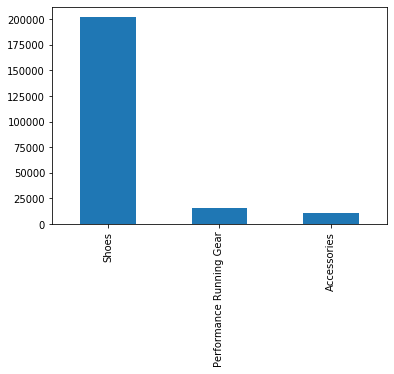

In [13]:
df.parent_group.value_counts().plot(kind= 'bar')

In [14]:
df.parent_group.value_counts()

Shoes                       202211
Performance Running Gear     15830
Accessories                  11180
Name: parent_group, dtype: int64

## most bought item
the most bought items are shoes. followed by performance running gear. 

In [15]:
df.fabric_desc.value_counts()

Black / White           21581
Black / Asphalt         13202
All Black                9202
White / Black            7812
Black / Lunar            7139
Navy / White             5285
All White                4813
Black                    4611
Forest / Jungle          3928
Storm / Flash            3628
Denim / White            3563
Black | Slate            3262
Rock | Slate             3124
Black | Shadow           3052
Shadow / Rust            3013
Black / Dark             2895
Malibu / Curacao         2769
Rust | Pacific           2669
Blue / Denim             2606
Glacier | White          2331
Silver                   2320
Flame / Shadow           2267
Charcoal / Rose          2191
Grey / Neon              2088
Navy                     2032
Blue / White             2004
Dawn / Jade              1946
Moss / Lime              1913
Red / Flash              1884
Grey / Atlantis          1880
                        ...  
Cocoa | Black              33
Purple / Rose              32
Dustrose  

there are many different colors , however people prefer black /white. 

In [16]:
df.group_desc.value_counts()

Cloud                                52272
Cloud X                              36386
Cloudflow.                           28553
Cloudflyer                           12231
Cloudswift                           10036
Cloudace                              7316
Cloud Waterproof                      6895
Cloudsurfer (Classic)                 5120
Cloud Terry                           4273
Cloudventure (Classic)                4263
Cloud 50 | 50                         3881
Cloudventure Waterproof (Classic)     3812
Mid Sock                              3583
Cloud (Classic)                       3296
Low Sock                              3264
Cloudrush                             3243
Cloudsurfer                           2835
Cloudventure Waterproof               2824
Lightweight-Cap                       2508
Cloudflyer Waterproof                 2395
Cloudventure                          2227
Comfort-T M                           2060
Cloudventure Peak (Classic)           1791
Cloud Edge 

The cloud model ( shoe) is the most sold item. I would guess it will be black and white. 

In [17]:
df.quantity.value_counts()

 1     219128
 0       6958
 2       2330
 3        390
 4        312
 5         48
 6         19
-1         18
 8          5
 7          5
 10         3
 12         2
 11         2
 9          1
Name: quantity, dtype: int64

I am not clear what packed quantity means. Does not make sense to me. I thought it is the quantiy of items bought, however why there are 0 and -1 in the data as well. Since at the time being I have no more inforamation about this whill not use this in my model . I need to ask a person with more bussiness knowledge of on about this. 

In [18]:
aid_count.sort_values(by=['tid'], ascending= False)

,aid,tid
662,38894.0,220
24445,429724.0,198
4435,174759.0,121
12034,344075.0,114
18153,401733.0,105
3587,154355.0,78
12035,344081.0,76
33509,477522.0,73
15725,389977.0,72
7759,253706.0,71


Let's look at one of the accounts who has several transactions.

In [19]:
df.query('aid== 11507')

,tid,aid,parent_group,group_desc,fabric_desc,size,order_date,quantity
14077,SO-1972407,11507.0,Performance Running Gear,Weather-Vest M,Black,M L,28.06.18,1
16250,SO-1850627,11507.0,Performance Running Gear,Performance-T M,Rust / Navy,M L,16.03.18,1
17115,SO-1972407,11507.0,Performance Running Gear,Lightweight Shorts M,Navy / Black,M L,28.06.18,1
18404,SO-2373031,11507.0,Performance Running Gear,Performance-T M,Black | Shadow,M L,27.03.19,1
19095,SO-2590727,11507.0,Performance Running Gear,Lightweight Shorts M,Shadow | Black,M L,25.06.19,1
20988,SO-2432707,11507.0,Performance Running Gear,Comfort-T M,White,M M,23.04.19,1
21318,SO-2373031,11507.0,Performance Running Gear,Hoodie M,Shadow,M M,27.03.19,1
25138,SO-1972407,11507.0,Performance Running Gear,Hybrid Shorts M,Black,M S,28.06.18,1
25643,SO-2432707,11507.0,Performance Running Gear,Tank-T M,Malibu Navy,M S,23.04.19,1
43739,SO-1899411,11507.0,Shoes,Cloud,Spray | Sea,W 8,17.12.18,1


looks like this person bought both men and women shoes , maybe for the whole family. They could be one lucky family.

# creating combined item
However I would say that the size and the parent group does not serve my purpose now. The idea is to write a fast version, 
and then in the next round make improvment to our model. 

Of course whenever the recommendation comes to mind there is the idea 
of collabrative filtering or content based filtering. However since there are not too much about the items at hand, therefore calculating similarity 
between them is difficult. I suggest a recommender system based on association rule mining and most popular 
items . for this I would join the group_descr and fabric_desc together and make one product based on fabric and group. 

In [20]:
df['combined_item'] = df[['group_desc', 'fabric_desc']].apply(lambda x: ''.join(x), axis=1)

In [21]:
df

,tid,aid,parent_group,group_desc,fabric_desc,size,order_date,quantity,combined_item
0,SO-1905014,464874.0,Shoes,Cloud (Classic),Black,M 7,05.05.18,1,Cloud (Classic)Black
1,SO-1791826,389046.0,Shoes,Cloud (Classic),Black,M 7,03.01.18,0,Cloud (Classic)Black
2,SO-1899817,461621.0,Shoes,Cloud (Classic),Black,M 7,30.04.18,1,Cloud (Classic)Black
3,SO-1798245,328237.0,Shoes,Cloud (Classic),Black,M 7,12.01.18,1,Cloud (Classic)Black
4,SO-1931576,482985.0,Shoes,Cloud (Classic),Storm,M 7,30.05.18,1,Cloud (Classic)Storm
5,SO-1927755,480258.0,Shoes,Cloud (Classic),Storm,M 7,01.06.18,1,Cloud (Classic)Storm
6,SO-1976076,511478.0,Shoes,Cloud (Classic),Sunset,M 7,01.07.18,1,Cloud (Classic)Sunset
7,SO-1890724,280810.0,Shoes,Cloud (Classic),Sunset,M 7,23.04.18,1,Cloud (Classic)Sunset
8,SO-2103389,613421.0,Shoes,Cloud,Red / Ox,M 7,05.10.18,1,CloudRed / Ox
9,SO-1815222,402775.0,Shoes,Cloud,Red / Ox,M 7,02.02.18,1,CloudRed / Ox


In [22]:
df_popularity=df.groupby('combined_item').count()['tid'].reset_index()
df_popularity

,combined_item,tid
0,Cloud (Classic)Atoll / Green,72
1,Cloud (Classic)Black,302
2,Cloud (Classic)Black / Malibu,67
3,Cloud (Classic)Black / Slate,153
4,Cloud (Classic)Black / White,643
5,Cloud (Classic)Blues / Yellow,13
6,Cloud (Classic)Charcoal / Rose,2
7,Cloud (Classic)Coral / Shadow,113
8,Cloud (Classic)Denim / White,177
9,Cloud (Classic)Diver / Lime,26


The df_popularity shows how may times one item has been bought. 

In [23]:
df_popularity.tid.sum()

229221

In [24]:
df_popularity['normed_popularity'] = df_popularity['tid']/df_popularity.tid.sum()
df_popularity

,combined_item,tid,normed_popularity
0,Cloud (Classic)Atoll / Green,72,0.000314
1,Cloud (Classic)Black,302,0.001318
2,Cloud (Classic)Black / Malibu,67,0.000292
3,Cloud (Classic)Black / Slate,153,0.000667
4,Cloud (Classic)Black / White,643,0.002805
5,Cloud (Classic)Blues / Yellow,13,0.000057
6,Cloud (Classic)Charcoal / Rose,2,0.000009
7,Cloud (Classic)Coral / Shadow,113,0.000493
8,Cloud (Classic)Denim / White,177,0.000772
9,Cloud (Classic)Diver / Lime,26,0.000113


## normalizing
I would normalize the data to divide it by the sum of all transactions. 
However there might have been a better approach to divide each by the number of items sold in their parent category. 

In [25]:
df_popularity.describe()

,tid,normed_popularity
count,315.000000,315.000000
mean,727.685714,0.003175
std,1311.107127,0.005720
min,1.000000,0.000004
25%,67.000000,0.000292
50%,267.000000,0.001165
75%,816.500000,0.003562
max,10307.000000,0.044965


In [26]:
df_popularity.query('tid== 10307') 

,combined_item,tid,normed_popularity
69,CloudBlack / White,10307,0.044965


This would confirm the above that the most sold item is shoes, model cloud ,and black and white color. 

In [27]:
df_popularity.sort_values(by='normed_popularity', ascending=False)


,combined_item,tid,normed_popularity
69,CloudBlack / White,10307,0.044965
52,Cloud XBlack / Asphalt,9849,0.042967
67,CloudAll Black,9202,0.040145
66,Cloud XWhite / Black,7812,0.034081
80,CloudNavy / White,5214,0.022747
68,CloudAll White,4813,0.020997
49,Cloud WaterproofBlack / Lunar,4744,0.020696
122,CloudflyerBlack / White,4018,0.017529
62,Cloud XStorm / Flash,3545,0.015465
104,Cloudflow.Black / Asphalt,3353,0.014628


In the first look it appears that the most sold items are shoes. ( no kidding :P)

The easiest approach would be to show the most popular items , according to sales. which in this case would be cloud shoes 
with different colors. 
This is just the baseline model.


## creating basket
I would create a dataset that looks at the transactions and how many items have been bought. 
Then I would filter the ones that have more than one item. 

In [28]:
basket = df.groupby('tid').count()['aid'].reset_index()
basket

,tid,aid
0,SO-1163293,1
1,SO-1167084,2
2,SO-1215859,2
3,SO-1276840,1
4,SO-1279174,1
5,SO-1327886,1
6,SO-1369476,1
7,SO-1378578,1
8,SO-1397307,6
9,SO-1408380,1


In [29]:
# create a basket of transactions that happen more than once in the database.
tid_baket=basket.query('aid > 1')['tid']

## filtering
Taking the data that has more than one transaction. 

In [30]:
df[df.tid.isin(tid_baket)]

,tid,aid,parent_group,group_desc,fabric_desc,size,order_date,quantity,combined_item
1,SO-1791826,389046.0,Shoes,Cloud (Classic),Black,M 7,03.01.18,0,Cloud (Classic)Black
6,SO-1976076,511478.0,Shoes,Cloud (Classic),Sunset,M 7,01.07.18,1,Cloud (Classic)Sunset
17,SO-2249767,543253.0,Shoes,Cloud,Red / Ox,M 7,12.01.19,1,CloudRed / Ox
21,SO-2119613,624564.0,Shoes,Cloud,Red / Ox,M 7,18.10.18,1,CloudRed / Ox
27,SO-2048176,577508.0,Shoes,Cloud,Red / Ox,M 7,26.08.18,1,CloudRed / Ox
28,SO-1809399,108320.0,Shoes,Cloud,Red / Ox,M 7,24.01.18,1,CloudRed / Ox
29,SO-2041323,565523.0,Shoes,Cloud,Red / Ox,M 7,20.08.18,1,CloudRed / Ox
34,SO-1962807,278752.0,Shoes,Cloud,All Black,M 7,23.06.18,1,CloudAll Black
36,SO-1815064,402663.0,Shoes,Cloud,All Black,M 7,01.02.18,1,CloudAll Black
39,SO-1822856,406484.0,Shoes,Cloud,All Black,M 7,12.02.18,1,CloudAll Black


In [31]:
df[df.tid== 'SO-1791826']

,tid,aid,parent_group,group_desc,fabric_desc,size,order_date,quantity,combined_item
1,SO-1791826,389046.0,Shoes,Cloud (Classic),Black,M 7,03.01.18,0,Cloud (Classic)Black
134887,SO-1791826,389046.0,Shoes,Cloud (Classic),Moss,M 8.5,03.01.18,0,Cloud (Classic)Moss


In [32]:
basket_set = df[df.tid.isin(tid_baket)].groupby('tid')['combined_item'].apply(list)

each transaction is one basket. the groupby ensures that If the person bought more than one item is shown. 


In [33]:
basket_set

tid
SO-1167084    [CloudventureCoral | Mulberry, CloudventureRes...
SO-1215859          [CloudaceRuby / Lava, CloudaceMist | Stone]
SO-1397307    [Mid SockRust | Navy, Mid SockBlack | Shadow, ...
SO-1476657    [Comfort-T WGrey, Running Tights WBlack, Tank-...
SO-1504483           [CloudNavy / White, Cloudflow.Dawn / Jade]
SO-1531214    [Lightweight Shorts MNavy / Black, Cloud XStor...
SO-1564679    [Low SockBlack | Shadow, Cloudflyer Waterproof...
SO-1571145    [Cloudsurfer (Classic)Ink / Jade, Cloudsurfer ...
SO-1577597    [Cloudflow.Petrol / Neon, Cloud XWater / Blues...
SO-1581321    [CloudflyerMaui / Lemon, Cloudsurfer (Classic)...
SO-1659448    [Cloudventure (Classic)Grey / Lava, Cloudventu...
SO-1676547       [Cloud EdgeTriple Grey, Cloud EdgeTriple Grey]
SO-1677115    [Cloud WaterproofStorm | Lunar, Cloudventure W...
SO-1683063    [CloudrushBlack / White, Cloudflow.Atlantis / ...
SO-1687705    [CloudDenim / White, CloudMulberry / Velvet, C...
SO-1693303    [Cloud (Classic)Limeli

The basket set has a size of 32607. 

## reformating
reformatting the data so it can be fed into the apriori algorithm. 

In [34]:

te = TransactionEncoder()
te_ary = te.fit(list(basket_set)).transform(list(basket_set))
df_apriori = pd.DataFrame(te_ary, columns=te.columns_)
df_apriori


,Cloud (Classic)Atoll / Green,Cloud (Classic)Black,Cloud (Classic)Black / Malibu,Cloud (Classic)Black / Slate,Cloud (Classic)Black / White,Cloud (Classic)Blues / Yellow,Cloud (Classic)Charcoal / Rose,Cloud (Classic)Coral / Shadow,Cloud (Classic)Denim / White,Cloud (Classic)Diver / Lime,...,Weather-Jacket WGrey / White,Weather-Jacket WNavy / Storm,Weather-Jacket WSea | Storm,Weather-Shirt MNavy Black,Weather-Shirt MStone / Shadow,Weather-Shirt MStorm Navy,Weather-Shirt WGrey White,Weather-Shirt WStorm Navy,Weather-Vest MBlack,Weather-Vest WNavy / Shadow
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
frequent_itemsets = apriori(df_apriori, min_support=.001 , use_colnames=True)


In [36]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [37]:
frequent_itemsets

,support,itemsets,length
0,0.002760,(Cloud (Classic)Black),1
1,0.001595,(Cloud (Classic)Black / Slate),1
2,0.006716,(Cloud (Classic)Black / White),1
3,0.001319,(Cloud (Classic)Coral / Shadow),1
4,0.002147,(Cloud (Classic)Denim / White),1
5,0.002116,(Cloud (Classic)Grey / Neon Pink),1
6,0.001748,(Cloud (Classic)Jade),1
7,0.001809,(Cloud (Classic)Lava),1
8,0.001288,(Cloud (Classic)Limelight),1
9,0.004723,(Cloud (Classic)Malibu / Denim),1


The association_df calculates the what items are more likely to be bought together. 

In [38]:

association_df=association_rules(frequent_itemsets, metric="lift", min_threshold=0.01)


In [39]:
association_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cloud (Classic)Malibu / Denim),(Cloud (Classic)Black / White),0.004723,0.006716,0.001012,0.214286,31.905088,0.000980,1.264179
1,(Cloud (Classic)Black / White),(Cloud (Classic)Malibu / Denim),0.006716,0.004723,0.001012,0.150685,31.905088,0.000980,1.171859
2,(Cloud TerrySilver),(Cloud TerryOlive),0.021130,0.005704,0.001012,0.047896,8.396390,0.000892,1.044314
3,(Cloud TerryOlive),(Cloud TerrySilver),0.005704,0.021130,0.001012,0.177419,8.396390,0.000892,1.189998
4,(Cloud TerrySilver),(Cloud TerryPebble),0.021130,0.014874,0.003527,0.166909,11.221418,0.003213,1.182494
5,(Cloud TerryPebble),(Cloud TerrySilver),0.014874,0.021130,0.003527,0.237113,11.221418,0.003213,1.283113
6,(Cloud WaterproofForest | Lunar),(Cloud WaterproofBlack / Lunar),0.010029,0.033704,0.001043,0.103976,3.084923,0.000705,1.078425
7,(Cloud WaterproofBlack / Lunar),(Cloud WaterproofForest | Lunar),0.033704,0.010029,0.001043,0.030937,3.084923,0.000705,1.021576
8,(Cloud WaterproofBlack / Lunar),(Cloud WaterproofStorm | Lunar),0.033704,0.006900,0.001012,0.030027,4.351556,0.000779,1.023843
9,(Cloud WaterproofStorm | Lunar),(Cloud WaterproofBlack / Lunar),0.006900,0.033704,0.001012,0.146667,4.351556,0.000779,1.132378


In [40]:
association_df_sorted=association_df.sort_values(by= ['lift' , 'antecedents'], ascending=False)

I will sort them by the highest lift. " Lift basically tells us that the likelihood of buying a two items together is x times more than the likelihood of just buying the one. A Lift of 1 means there is no association between products A and B. Lift of greater than 1 means products A and B are more likely to be bought together. Finally, Lift of less than 1 refers to the case where two products are unlikely to be bought together."

Source : https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/

In [41]:
association_df_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
351,(Sweat Pants WBeluga),(Hoodie WBeluga),0.003527,0.004416,0.001257,0.356522,80.729891,0.001242,1.547191
350,(Hoodie WBeluga),(Sweat Pants WBeluga),0.004416,0.003527,0.001257,0.284722,80.729891,0.001242,1.393128
348,(Sweat Pants MShadow),(Hoodie MShadow),0.007084,0.006072,0.002208,0.311688,51.329398,0.002165,1.444008
349,(Hoodie MShadow),(Sweat Pants MShadow),0.006072,0.007084,0.002208,0.363636,51.329398,0.002165,1.560296
472,(Running Pants MShadow),(Weather-Jacket MBlack / Shadow),0.006563,0.003864,0.001104,0.168224,43.534045,0.001079,1.197601
473,(Weather-Jacket MBlack / Shadow),(Running Pants MShadow),0.003864,0.006563,0.001104,0.285714,43.534045,0.001079,1.390812
400,(Performance-T MBlack | Shadow),(Lightweight Shorts MShadow | Black),0.004754,0.008250,0.001564,0.329032,39.883847,0.001525,1.478089
401,(Lightweight Shorts MShadow | Black),(Performance-T MBlack | Shadow),0.008250,0.004754,0.001564,0.189591,39.883847,0.001525,1.228079
474,(Tank-T MMalibu Navy),(Tank-T MNavy / Black),0.006870,0.006471,0.001503,0.218750,33.804650,0.001458,1.271717
475,(Tank-T MNavy / Black),(Tank-T MMalibu Navy),0.006471,0.006870,0.001503,0.232227,33.804650,0.001458,1.293522


In [42]:
association_df_sorted[association_df_sorted['antecedents'] == {'CloudBlack / White'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
187,(CloudBlack / White),(CloudDenim / White),0.07299,0.029104,0.005152,0.070588,2.425364,0.003028,1.044635
195,(CloudBlack / White),(CloudNavy / White),0.07299,0.043764,0.006839,0.093697,2.140991,0.003645,1.055096
196,(CloudBlack / White),(CloudRed / Ox),0.07299,0.015181,0.002177,0.029832,1.965111,0.001069,1.015102
199,(CloudBlack / White),(CloudSea / Stone),0.07299,0.009875,0.001380,0.018908,1.914655,0.000659,1.009206
192,(CloudBlack / White),(CloudMulberry / Velvet),0.07299,0.012789,0.001748,0.023950,1.872719,0.000815,1.011435
189,(CloudBlack / White),(CloudForest / Jungle),0.07299,0.021652,0.002944,0.040336,1.862947,0.001364,1.019470
164,(CloudBlack / White),(CloudAll White),0.07299,0.043978,0.005704,0.078151,1.777042,0.002494,1.037070
182,(CloudBlack / White),(CloudBlue / Denim),0.07299,0.024872,0.003036,0.041597,1.672431,0.001221,1.017451
190,(CloudBlack / White),(CloudMint),0.07299,0.009722,0.001165,0.015966,1.642322,0.000456,1.006346
184,(CloudBlack / White),(CloudCharcoal / Rose),0.07299,0.019413,0.002055,0.028151,1.450123,0.000638,1.008991


In [43]:
association_df_sorted[association_df_sorted['antecedents'] == {'Sweat Pants WBeluga'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
351,(Sweat Pants WBeluga),(Hoodie WBeluga),0.003527,0.004416,0.001257,0.356522,80.729891,0.001242,1.547191


In [44]:
association_df_sorted[association_df_sorted['antecedents'] == {'Hoodie WBeluga'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
350,(Hoodie WBeluga),(Sweat Pants WBeluga),0.004416,0.003527,0.001257,0.284722,80.729891,0.001242,1.393128


# Reccommendation : 
To put it all together, every time we have an antecedents in the basket , we would recommend the consequents that has the highest lift , 
and that lift is > 1.
However if there is only one consequent to be chosen from , we recommend that consequents and for the rest we 
would recommend the most popular items , in our case are taken from the below table.  



In [45]:
df_popularity.sort_values(by='normed_popularity', ascending=False).head(5)


,combined_item,tid,normed_popularity
69,CloudBlack / White,10307,0.044965
52,Cloud XBlack / Asphalt,9849,0.042967
67,CloudAll Black,9202,0.040145
66,Cloud XWhite / Black,7812,0.034081
80,CloudNavy / White,5214,0.022747


# example : 

In [46]:
association_df_sorted[association_df_sorted['antecedents'] == {'CloudBlack / White'}].head(4)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
187,(CloudBlack / White),(CloudDenim / White),0.07299,0.029104,0.005152,0.070588,2.425364,0.003028,1.044635
195,(CloudBlack / White),(CloudNavy / White),0.07299,0.043764,0.006839,0.093697,2.140991,0.003645,1.055096
196,(CloudBlack / White),(CloudRed / Ox),0.07299,0.015181,0.002177,0.029832,1.965111,0.001069,1.015102
199,(CloudBlack / White),(CloudSea / Stone),0.07299,0.009875,0.001380,0.018908,1.914655,0.000659,1.009206


For example if a person has put cloud black/white into basket. that recommendation would be the four consequents showing above. However if the item at the basket had less than 4 consequent, we would show the most popular items which is shown in the df_popularity. In the case that the person has more than one item in the shopping cart, the items with the highest lift would be recommended to them. 

# Outlook : 
The date can be used to find seasonal trends and make recommendation based on that. 
This approach was just a fast prototype, when more data is hand a more elaborate model like colabrative filtering would be used.
Once there is more data about the customers , they can be made into segments and make recommendation based on that. 
If there was data about the people who just looked at an item , we could have also calculate precision and recall of 
how many people would actually buy the items. 

# difficulties :
The study case was a reasonable one, I had to refresh my knowledge on recommender systems. 
The idea was not to spend more than two hours on the case study that is why I have not tried different methods.

I used efficent apriori before using mlxtend but had no luck with the first library. 
Over all I had fun .

# source 
http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/
https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/
https://medium.com/datadriveninvestor/how-to-build-a-recommendation-system-for-purchase-data-step-by-step-d6d7a78800b6

# thank you 
thanks for your time and looking forward to next steps